In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[6],gb7[4],red7[2],yg7[0]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
sns.set_palette(cp4)
sns.color_palette()

[(0.20872433679354097, 0.2971118800461361, 0.23389619377162635),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
def CoCoPeLia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

all_dev = 8
def keep_dev_8(dataframe):
    return dataframe[dataframe['dev_num'] == all_dev]

    
devices=8
machine = 'vulcan'
Mmax = math.sqrt(32*1e9/(3*8))/256 #Tesla-V100
MemMax = 4*(1024*1024*1024)*devices # Questionable limit
Rmax_Gflops = 7*1024*devices
#Mmax = math.sqrt(11*1e9/(3*8))/256 #Tesla-K40
#machine = 'testbed-II_Tesla-V100'

version="1.4"
split="ST-2D-BLOCK-CYCLIC"
sr_over=""
implementation="_UN-PB-L4"
pw_optimize="_PW-PRED-PERF"

impl_hops="_ALL-HOPS-1-0.15"
homedir = "~/mount_vulcan"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench"
XKBLAS_nocache_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/XKBLASDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('XKBLAS_nocache_data len: %d' % len(XKBLAS_nocache_data))
BLASx_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('BLASx_data len: %d' % len(BLASx_data))
BLASxEx_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxExDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('BLASxEx_data len: %d' % len(BLASxEx_data))
cuBLASXt_best_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/cuBLASXtDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('cuBLASXt_best_data len: %d' % len(cuBLASXt_best_data))

sr_over=""
impl_hops="_RONLY-HOPS-1-0.15"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Rhops"
CoCopeLia_data_rhops = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                          %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('CoCopeLia_data_rhops len: %d' % len(CoCopeLia_data_rhops))
CoCopeLia_data_rhops_alldev = keep_dev_8(CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                 %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_rhops_alldev len: %d' % len(CoCopeLia_data_rhops_alldev))

sr_over=""
impl_hops=""
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-nohops"
CoCopeLia_data_nohops = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('CoCopeLia_data_nohops len: %d' % len(CoCopeLia_data_nohops))
CoCopeLia_data_nohops_alldev = keep_dev_8(CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                             %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_nohops_alldev len: %d' % len(CoCopeLia_data_nohops_alldev))

sr_over=""
impl_hops="_RONLY-HOPS-1-0.50"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-Rhops-0.5pen"
#CoCopeLia_data_rhops_05pen = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
#print('CoCopeLia_data_rhops_05pen len: %d' % len(CoCopeLia_data_rhops_05pen))
CoCopeLia_data_rhops_05pen_alldev = keep_dev_8(CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_rhops_05pen_alldev len: %d' % len(CoCopeLia_data_rhops_05pen_alldev))


XKBLAS_nocache_data len: 5830
BLASx_data len: 6007
BLASxEx_data len: 6012
cuBLASXt_best_data len: 6300
CoCopeLia_data_rhops len: 6060
CoCopeLia_data_rhops_alldev len: 6020
CoCopeLia_data_nohops len: 6070
CoCopeLia_data_nohops_alldev len: 6020
CoCopeLia_data_rhops_05pen_alldev len: 10100


In [6]:
def CoCoPeLia_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_modified_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_grouby_min(df):
    return df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).min()

def CoCoPeLia_select_subset(df, subset_str):
    if subset_str == 'square': 
        return df.loc[(df['M'] == df['N']) & (df['M'] == df['K'])]
    elif subset_str == 'fat-thin':
        return df.loc[(df['M'] == df['N']) & (df['M'] > df['K'])]
    elif subset_str == 'thin-fat':        
        return df.loc[(df['M'] == df['N']) & (df['M'] < df['K'])]
    
def CoCoPeLia_select_indata_locs(df, loc1, loc2, loc3):
    return df.loc[(df['Asloc'] == loc1) & (df['Bsloc'] == loc2) & (df['Csloc'] == loc3) & (df['M'] == df['N']) & (df['M'] == df['K'])]

In [7]:
font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)

# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [8]:
def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

In [9]:
    dgemm_bytes(BLASxEx_data)
    dgemm_flops(BLASxEx_data)
    BLASxEx_data['perf'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['timer'])
    print("BLASxEx_data mean perf = %lf Gflops/s" % BLASxEx_data['perf'].mean())
    BLASxEx_data['loc_str'] = str(BLASxEx_data['Asloc']) + '_' +  str(BLASxEx_data['Bsloc']) + '_' + str(BLASxEx_data['Csloc'])
    BLASxEx_data['loc_str'] = 100*(BLASxEx_data['Asloc']+1) + 10*(BLASxEx_data['Bsloc']+1) + BLASxEx_data['Csloc']+1
    BLASxEx_data['imp'] = 'BLASX'
    
    dgemm_bytes(XKBLAS_nocache_data)
    dgemm_flops(XKBLAS_nocache_data)
    XKBLAS_nocache_data['perf'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['timer'])
    print("XKBLAS_nocache_data mean perf = %lf Gflops/s" % XKBLAS_nocache_data['perf'].mean())
    XKBLAS_nocache_data['loc_str'] = str(XKBLAS_nocache_data['Asloc']) + '_' +  str(XKBLAS_nocache_data['Bsloc']) + '_' + str(XKBLAS_nocache_data['Csloc'])
    XKBLAS_nocache_data['loc_str'] = 100*(XKBLAS_nocache_data['Asloc']+1) + 10*(XKBLAS_nocache_data['Bsloc']+1) + XKBLAS_nocache_data['Csloc']+1
    XKBLAS_nocache_data['imp'] = 'XKBLAS'
    
    dgemm_bytes(CoCopeLia_data_nohops_alldev)
    dgemm_flops(CoCopeLia_data_nohops_alldev)
    CoCopeLia_data_nohops_alldev['perf'] = CoCopeLia_data_nohops_alldev['flops']/(1e9*CoCopeLia_data_nohops_alldev['timer'])
    print("CoCopeLia_data_nohops_alldev mean perf = %lf Gflops/s" % CoCopeLia_data_nohops_alldev['perf'].mean())
    CoCopeLia_data_nohops_alldev['loc_str'] = str(CoCopeLia_data_nohops_alldev['Asloc']) + '_' +  str(CoCopeLia_data_nohops_alldev['Bsloc']) + '_' + str(CoCopeLia_data_nohops_alldev['Csloc'])
    CoCopeLia_data_nohops_alldev['loc_str'] = 100*(CoCopeLia_data_nohops_alldev['Asloc']+1) + 10*(CoCopeLia_data_nohops_alldev['Bsloc']+1) + CoCopeLia_data_nohops_alldev['Csloc']+1
    CoCopeLia_data_nohops_alldev['imp'] = 'Nohops'
    
    dgemm_bytes(CoCopeLia_data_rhops_alldev)
    dgemm_flops(CoCopeLia_data_rhops_alldev)
    CoCopeLia_data_rhops_alldev['perf'] = CoCopeLia_data_rhops_alldev['flops']/(1e9*CoCopeLia_data_rhops_alldev['timer'])
    print("CoCopeLia_data_rhops_alldev mean perf = %lf Gflops/s" % CoCopeLia_data_rhops_alldev['perf'].mean())
    CoCopeLia_data_rhops_alldev['loc_str'] = 100*(CoCopeLia_data_rhops_alldev['Asloc']+1) + 10*(CoCopeLia_data_rhops_alldev['Bsloc']+1) + CoCopeLia_data_rhops_alldev['Csloc']+1
    CoCopeLia_data_rhops_alldev['imp'] = 'Rhops-0.15'

    dgemm_bytes(CoCopeLia_data_rhops_05pen_alldev)
    dgemm_flops(CoCopeLia_data_rhops_05pen_alldev)
    CoCopeLia_data_rhops_05pen_alldev['perf'] = CoCopeLia_data_rhops_05pen_alldev['flops']/(1e9*CoCopeLia_data_rhops_05pen_alldev['timer'])
    print("CoCopeLia_data_rhops_05pen_alldev mean perf = %lf Gflops/s" % CoCopeLia_data_rhops_05pen_alldev['perf'].mean())
    CoCopeLia_data_rhops_05pen_alldev['loc_str'] = 100*(CoCopeLia_data_rhops_05pen_alldev['Asloc']+1) + 10*(CoCopeLia_data_rhops_05pen_alldev['Bsloc']+1) + CoCopeLia_data_rhops_05pen_alldev['Csloc']+1
    CoCopeLia_data_rhops_05pen_alldev['imp'] = 'Rhops-0.5'

BLASxEx_data mean perf = 10466.576963 Gflops/s
XKBLAS_nocache_data mean perf = 8862.517626 Gflops/s
CoCopeLia_data_nohops_alldev mean perf = 13161.630009 Gflops/s
CoCopeLia_data_rhops_alldev mean perf = 15640.159582 Gflops/s
CoCopeLia_data_rhops_05pen_alldev mean perf = 14828.126744 Gflops/s


   T  dev_num  dev_id_token  cachesize_limit TransA TransB   alpha    beta  \
0 -1       -1             0                0      N      N  1.2345  1.1154   
1 -1       -1             0                0      N      N  1.2345  1.1154   
2 -1       -1             0                0      N      N  1.2345  1.1154   
3 -1       -1             0                0      N      N  1.2345  1.1154   
4 -1       -1             0                0      N      N  1.2345  1.1154   

      M     N  ...  Asloc  Bsloc  Csloc  CsOutloc          flops       bytes  \
0  1638  1638  ...     -1     -1     -1        -1  1098980188488  5388862752   
1  1638  1638  ...     -1     -1     -1        -1  1098980188488  5388862752   
2  1638  1638  ...     -1     -1      0         0  1098980188488  5388862752   
3  1638  1638  ...     -1     -1      0         0  1098980188488  5388862752   
4  1638  1638  ...      0      0     -1        -1  1098980188488  5388862752   

   loc_str     imp     timer         perf  
0     

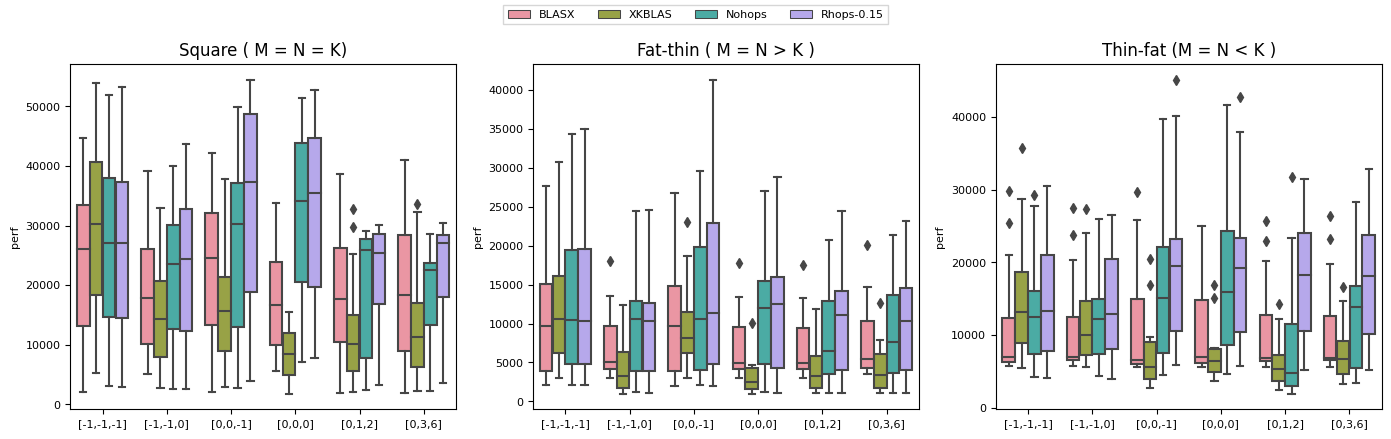

In [22]:
CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_nohops_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_rhops_alldev])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_rhops_05pen_alldev])
CoCopeLia_all_data_mean = CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev)
print(CoCopeLia_all_data_mean.head(5))
CoCopeLia_all_data_alldev_list = []
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
elem_name=['Square ( M = N = K)', 'Fat-thin ( M = N > K )', 'Thin-fat (M = N < K )']
fig, ax = plt.subplots(1,3)
fig.set_size_inches(width*4, 2*height)
fig.subplots_adjust(left=.05, bottom=.06, right=.99, top=.86)
for ctr in range(0,len(ax)):
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'perf', hue = 'imp', ax=ax[ctr])
    ax[ctr].set_title(elem_name[ctr])
    ax[ctr].get_legend().remove()
    #ax[ctr].set_xticks([])
    ax[ctr].set_xlabel('')
    ax[ctr].set_xticklabels(['[-1,-1,-1]', '[-1,-1,0]', '[0,0,-1]', '[0,0,0]', '[0,1,2]', '[0,3,6]'])
    if ctr == 0: 
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=4)
fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_sumup.pdf' % (machine))        

In [11]:
# Plot all, in respect to Problem size
for loc in [[-1,-1,-1], [-1,-1,0], [0,0,-1], [0,0,0], [0,1,2], [0,3,6]]:
    print("loc = " + str(loc))
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.16, bottom=.16, right=.99, top=.86)

    XKBLAS_nocache_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(XKBLAS_nocache_data, loc[0], loc[1], loc[2]))
    XKBLAS_nocache_data_p.sort_values(inplace = True, by = ['bytes'])
    print("XKBLAS_nocache_data_p mean perf = %lf Gflops/s" % XKBLAS_nocache_data_p['perf'].mean())
    plt.plot(XKBLAS_nocache_data_p['bytes'], XKBLAS_nocache_data_p['perf'], color=cp4[0], label='XKBLAS-fair')

    #BLASx_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(BLASx_data, loc[0], loc[1], loc[2]))
    #plt.plot(dgemm_bytes(BLASx_data_p), dgemm_flops(BLASx_data_p)/(1e9*BLASx_data_p['timer']),  color=cp4[2], label='BLASX-default')

    BLASxEx_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(BLASxEx_data, loc[0], loc[1], loc[2]))
    BLASxEx_data_p.sort_values(inplace = True, by = ['bytes'])
    print("BLASxEx_data_p mean perf = %lf Gflops/s" % BLASxEx_data_p['perf'].mean())
    plt.plot(BLASxEx_data_p['bytes'], BLASxEx_data_p['perf'], color=cp4[1], label='BLASX-buf-reuse')

    #cuBLASXt_best_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(cuBLASXt_best_data, loc[0], loc[1], loc[2]))
    #plt.plot(dgemm_bytes(cuBLASXt_best_data_p), dgemm_flops(cuBLASXt_best_data_p)/(1e9*cuBLASXt_best_data_p['timer']),  color=cp4[4], label='cuBLASXt-best')
 
    
    CoCopeLia_data_nohops_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_nohops_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_nohops_alldev_p.sort_values(inplace = True, by = ['bytes'])
    print("CoCopeLia_data_nohops_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_nohops_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_nohops_alldev_p['bytes'], CoCopeLia_data_nohops_alldev_p['perf'], color='g', label='CoCopeLia.1.2')

    CoCopeLia_data_rhops_05pen_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_rhops_05pen_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_rhops_05pen_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_rhops_05pen_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_rhops_05pen_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_rhops_05pen_alldev_p['bytes'], CoCopeLia_data_rhops_05pen_alldev_p['perf'], color='c', label='CoCopeLia.1.4 Rhops 0.5 pen')
    
    CoCopeLia_data_rhops_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_rhops_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_rhops_alldev_p.sort_values(inplace = True, by = ['bytes'])
    print("CoCopeLia_data_rhops_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_rhops_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_rhops_alldev_p['bytes'], CoCopeLia_data_rhops_alldev_p['perf'], color='orange', label='CoCopeLia.1.4 Rhops')
    
    plt.grid(axis='y')
    plt.ylabel('Performance (Gflops/s)')
    plt.xlabel('Problem Size')

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    plt.axhline(Rmax_Gflops, linewidth = 0.5, color='b', linestyle = '--')
    plt.text(xmax - (xmax-xmin)*0.05, Rmax_Gflops*0.95, 'Peak' , fontsize = font -2, color='b')
    plt.axvline(MemMax,color='c',linewidth = 0.5, linestyle = '--')
    plt.text(MemMax*1.01, ymin + (ymax-ymin)*0.05, 'Combined GPU Mem', fontsize = font -2, color='c')

    plt.xscale('log')
    #fig.set_size_inches(width, height)
    fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
        fontsize=font, fancybox = False, ncol=3)
    #fig.savefig('Plot-Transpose-Comparisson-%s.pdf' % machine)
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_dataloc_%d_%d_%d.png' % (machine, loc[0], loc[1], loc[2]))
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_dataloc_%d_%d_%d.pdf' % (machine, loc[0], loc[1], loc[2]))
    plt.close()

loc = [-1, -1, -1]
XKBLAS_nocache_data_p mean perf = 29995.778486 Gflops/s
BLASxEx_data_p mean perf = 24412.811530 Gflops/s
CoCopeLia_data_nohops_alldev_p mean perf = 27432.481918 Gflops/s
CoCopeLia_data_rhops_05pen_alldev_p mean perf = 27530.855170 Gflops/s
CoCopeLia_data_rhops_alldev_p mean perf = 27547.145969 Gflops/s
loc = [-1, -1, 0]
XKBLAS_nocache_data_p mean perf = 15407.695840 Gflops/s
BLASxEx_data_p mean perf = 19321.486290 Gflops/s
CoCopeLia_data_nohops_alldev_p mean perf = 22576.571965 Gflops/s
CoCopeLia_data_rhops_05pen_alldev_p mean perf = 23763.329038 Gflops/s
CoCopeLia_data_rhops_alldev_p mean perf = 23652.369498 Gflops/s
loc = [0, 0, -1]
XKBLAS_nocache_data_p mean perf = 16079.068422 Gflops/s
BLASxEx_data_p mean perf = 23293.586064 Gflops/s
CoCopeLia_data_nohops_alldev_p mean perf = 27445.845564 Gflops/s
CoCopeLia_data_rhops_05pen_alldev_p mean perf = nan Gflops/s
CoCopeLia_data_rhops_alldev_p mean perf = 34478.826186 Gflops/s
loc = [0, 0, 0]
XKBLAS_nocache_data_p mean 